For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?
(Null hypothesis) H0: Has not increased
H1: Has increased

True positive - Determine that it has gone up.
True negative - Find that it has not changed.

(False Positive) Type I error: Determine that it increased or stayed the same and it didnt.
Type II error: Say that it decreased or stayed the same when it actually increased.

Would use a paired T test

Is the website redesign any good?
H0 : No change or decreased
H1: Increase in visits since redesigned website

True positive - It increased
True negative- It decreased or stayed the same.

Type I error : Determine it actually decreased or stayed the same instead of increased.
Type II error : Determine that it actually increased instead of decreased.

Would use independent sample T-test because easier to control.

Is our television ad driving more sales?
H0 : The television ad has made no difference in sales.
H1: The ad has increased more sales.

True positive - It increased
True negative - It decreased or stayed the same.

Type I error - Increased and it has. 
Type II error - Determine that it actually decreased when it actually increased. 

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

What are we comparing?
-Average time (numberic continous values) for two different groups (categories)
- One sample or two sample?
-One tailed or two tailed?

scipy.stats.ttest_ind_from_stats(mean1, sdev1, nobs1, mean2, sdev2, nobs2, equal_var = False)

In [72]:
import seaborn as sns
import pandas as pd
import env
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from pydataset import data

Form a hypothesis:

h_0:average time to sell at office 1 == average time to sell at office 2


h_a: average time to sell at office 1 != average time to sell at office 2

In [73]:
alpha = .05

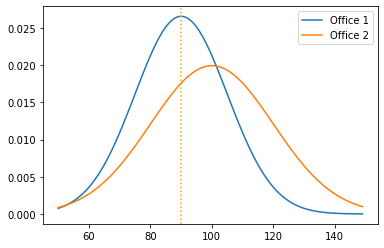

In [74]:
#visualize distributions


x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label = 'Office 1')
plt.plot(x, y2, label = 'Office 2')
plt.axvline(90, ls = ":", color = "orange")

plt.legend()

In [75]:
scipy.stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var = False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

Load the mpg dataset and use it to answer the following questions:

In [76]:
mpg = data('mpg')

In [77]:
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [ ]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
# H_o : # There is no difference in fuel - efficiency in cars from 2008 to 1999.
# H_A : There is a difference in same cars.

In [78]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


<AxesSubplot:>

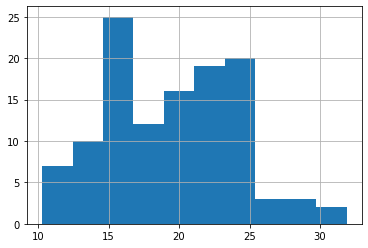

In [79]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe


#plot
fe_2008.hist()

<AxesSubplot:>

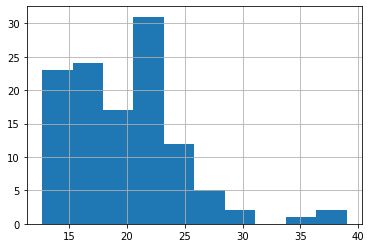

In [80]:
fe_1999.hist()

In [82]:
# (N>30,we we meet normality condition, not an issue due to sample size)

fe_2008.count(), fe_1999.count()

(117, 117)

In [83]:
# Variance is the same 


fe_2008.var(), fe_1999.var()

(22.550836772260343, 25.850396545865912)

In [84]:
# # stats Levene test - returns p value. small p-value means unequal variances
stats.levene(fe_2008, fe_1999)

# high p-value suggests that the populations have equal variances

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [85]:
# calculate t-statistic and p value

t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [86]:
if p < alpha:
    print('Reject null')
else:
    print('Fail to reject null')

Fail to reject null


In [87]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

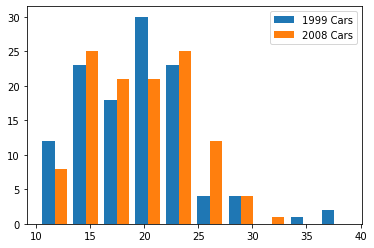

In [88]:
plt.hist([fe_1999, fe_2008], label=['1999 Cars', '2008 Cars'])
plt.legend()

In [89]:
# Are compact cars more fuel-efficient than the average car?
# H0 : MPG for compact cars is <= the mpg for average car
# HA: MPG for compact cars is > mpg for average car 

In [95]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
pop_mean = mpg.avg_fe.mean()

In [96]:
# Do manual cars get better gas mileage than automatic cars?
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [97]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [98]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

<AxesSubplot:>

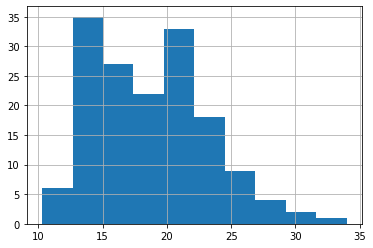

In [101]:
fe_auto.hist()

<AxesSubplot:>

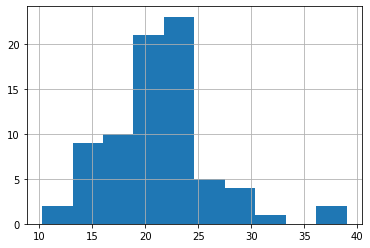

In [102]:
fe_manual.hist()

In [104]:
# look at variance
fe_auto.var(), fe_manual.var()

(20.428279095002054, 25.665633639828275)

In [105]:
# Levene Test
stats.levene(fe_auto, fe_manual)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [106]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2

(4.652577547151351, 2.7552323050220026e-06)

In [108]:
fe_manual.mean(), fe_auto.mean()

(21.629228592155194, 18.583199507835747)

In [110]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

Text(0.5, 1.0, 'Manual transmission gets better fuel effiency')

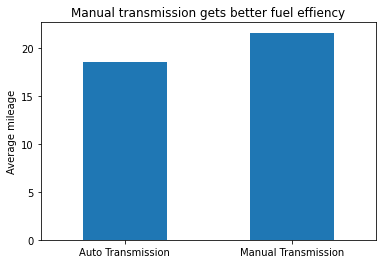

In [111]:
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Manual transmission gets better fuel effiency')